# Music Genre Classification

**Goal:** Predict the genre of a song based on precomputed audio features from the GTZAN dataset.

**Dataset:** `features_30_sec.csv` (30-second segments, with MFCCs, chroma, spectral features, tempo, etc.)

**Machine Learning Model:** Random Forest Classifier

**Optional Enhancements:**
- PCA visualization of feature clusters
- Similarity-based song recommendations


In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# Path to the CSV
csv_path = "/Users/jaidynmoodley/Documents/music-genre-classification/data/features_30_sec.csv"

# Load CSV
df = pd.read_csv(csv_path)
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


**Note:** The CSV contains columns like MFCCs, chroma, spectral features, tempo, and a `label` column for genres.

In [33]:
# Verify dataset is balanced (100 songs per genre)
df['label'].value_counts()

label
blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: count, dtype: int64

In [34]:
# Drop filename and label columns and keep only numeric features
X = df.drop(['filename', 'label'], axis=1).values
y = df['label'].values
# X is feature matrix(rows=songs, columns=features) aka all the numeric features
#y is target vector (one genre per song) aka the genre labels

In [35]:
# Split into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [36]:
# Standardize features so they're on the same scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Prevents loudness or tempo (big numbers) from dominating MFCCs (smaller numbers)

In [37]:
#Train a Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Accuracy: 0.775
              precision    recall  f1-score   support

       blues       0.79      0.75      0.77        20
   classical       0.86      0.95      0.90        20
     country       0.71      0.75      0.73        20
       disco       0.71      0.60      0.65        20
      hiphop       0.65      0.75      0.70        20
        jazz       0.77      0.85      0.81        20
       metal       0.89      0.85      0.87        20
         pop       0.86      0.90      0.88        20
      reggae       0.76      0.80      0.78        20
        rock       0.73      0.55      0.63        20

    accuracy                           0.78       200
   macro avg       0.77      0.78      0.77       200
weighted avg       0.77      0.78      0.77       200



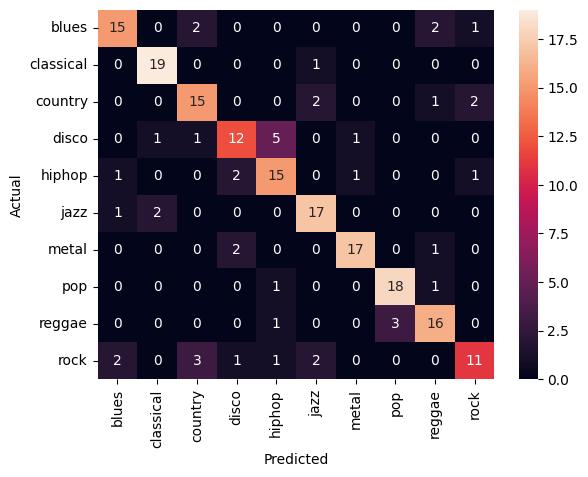

In [38]:
y_pred = rf_model.predict(X_test)

# Accuracy: how many predictions correct 
# Classification report: precision/recall/F1 for each genre

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Interpretation:** The confusion matrix shows where the model performs well and where genres are commonly misclassified. Diagonal shows the number of songs correctly identified. Off-diagonal shows the number of songs incorrectly classified. Shows which genres overlapped.

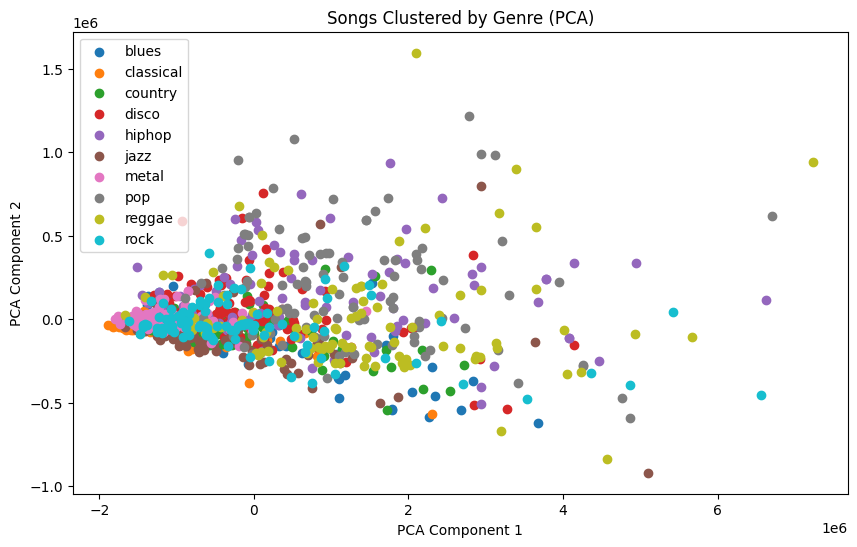

In [39]:
# Graph 2D scatter plot of songs colored by genre to visualize clusters

pca = PCA(n_components=2)
  # PCA = Principal Component Analysis: reduces features to 2 numbers per song
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10,6))
for genre in np.unique(y):
    indices = np.where(y == genre)
    plt.scatter(X_pca[indices,0], X_pca[indices,1], label=genre)
plt.legend()
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Songs Clustered by Genre (PCA)")
plt.show()

**Interpretation:** PCA shows how songs with similar features cluster by genre. Overlapping clusters may indicate similar-sounding genres.

In [40]:
# Compute cosine similarity between feature vectors
similarities = cosine_similarity(X)

# Most similar songs to the first song
most_similar_idx = np.argsort(-similarities[0])[1:6]
print("Most similar songs to the first song:")
for idx in most_similar_idx:
    print(df['filename'][idx], "-", df['label'][idx])

Most similar songs to the first song:
jazz.00004.wav - jazz
disco.00057.wav - disco
blues.00014.wav - blues
jazz.00020.wav - jazz
jazz.00063.wav - jazz


**Note:** This is a simple recommendation system to find songs with similar audio features, regardless of genre.